## **EVALUACIÓN MODELOS CON DATOS SIN OUTLIERS**
Volvemos a evaluar los modelos usando esta vez el dataset sin Outliers, en el que se han excluido 17 viviendas con perios superiores al límite superior obtenido a partir del IQR.

Los modelos se aplicaran tanto a estos datos como a los mismos normalizados, utilizando MinMaxScaler.

Se aplican diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Regresión Lineal
* Regresión Bridge
* SVM-Support Vector Machine
* XgBoost Regresion
* Gradient Boosting Regressor
* Arbol de Regresión

### **Importamos las librerías necesarias:**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import warnings

### **Importamos el modulo con las funciones para el calculo de modelos**

In [2]:
from ipynb.fs.defs.Funciones_modelos_ML import regresion_lineal,regresion_ridge, svm_support, xgboost_regresion, gb_regresion, arbol_regresion

In [3]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data = pd.read_csv(file_path, index_col = 0)

In [4]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


#### **Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [5]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

#### **Recuperamos la variable objetivo y las features del store, así como los datasets de train y test**

In [6]:
%store -r datos_without_outliers
features_train = datos_without_outliers.features_train
target_train = datos_without_outliers.target_train
features_test = datos_without_outliers.features_test
target_test = datos_without_outliers.target_test
features = datos_without_outliers.features
target = datos_without_outliers.target

#### **Regresión lineal**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
#Definimos una función para aplicar regresiones lineales. 

r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_lineal(features_train, target_train, features_test, target_test)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916


### **Procesamiento de datos - normalización**

Procedemos a procesar los datos aplicando MinMaxScaler para normalizarlos aplicando una escala entre 0 y 1. Esto lo aplicaremos en todos los modelos y tendremos finalmente una tabla comparativa de la evaluación de modelos con datos sin procesar y datos escalados.

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
features_train_esc = scale.fit_transform(features_train)
features_test_esc = scale.fit_transform(features_test)

**Regresión Lineal sin outliers y con datos escalados**

In [10]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_lineal(features_train_esc, target_train, features_test_esc, target_test)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Datos escalados/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061


### **Regresión Ridge**

In [11]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_ridge(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317


El modelo de regresión lineal presenta mejores resultados que el modelo bridge.
<br>
Veamos otros tipos de modelos a comparar.

**Regresión Bridge sin outliers y con datos escalados**

In [12]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_ridge(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Datos escalados/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904


### **SVM-Support Vector Machine**


In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = svm_support(features_train, target_train, features_test, target_test, kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Sin procesar/Sin outliers",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448


Este modelo presenta los mejores resultados para el parámetro "linear", el resto no ajusta bien el modelo.

**SVM sin outliers y con datos escalados**

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = svm_support(features_train_esc, target_train, features_test_esc, target_test, kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Datos escalados/Sin outliers",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


### **XGBoost**

In [15]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = xgboost_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


**XGBoost sin outliers con datos escalados**

In [16]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = xgboost_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Datos escalados/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


### **Gradient Boosting Regressor**

In [17]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = gb_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


**Gradient Boosting Regressor sin outliers y con datos escalados**

In [18]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = gb_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Datos escalados/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


### **Random Forest Regressor**

In [19]:
r2_train,r2_test, MAE_train,MAE_test,target_train_pred,target_test_pred = arbol_regresion(features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar/Sin outliers',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


**Random Forest Regressor sin outliers y con datos escalados**

In [20]:
r2_train,r2_test, MAE_train,MAE_test,target_train_pred,target_test_pred = arbol_regresion(features_train_esc, target_train, features_test_esc, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Datos escalados/Sin outliers',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
3,Regresión Bridge,Datos escalados/Sin outliers,0.3230,0.3019,118907.210966,140214.262904
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
5,SVM poly,Sin procesar/Sin outliers,-0.1033,-0.0827,131935.423900,142763.350407
6,SVM rbf,Sin procesar/Sin outliers,-0.1105,-0.0879,132262.552613,143032.003255
7,SVM sigmoid,Sin procesar/Sin outliers,-0.1107,-0.0881,132274.251154,143042.550448
8,SVM linear,Datos escalados/Sin outliers,-0.1105,-0.0878,132250.642532,143017.931102
9,SVM poly,Datos escalados/Sin outliers,-0.1097,-0.0870,132191.334323,142955.928096


### **Valoración de resultados modelos sin Outliers**

Tras hacer diferentes pruebas de entranamiento el modelo aplicado a datos sin outliers presenta mejores resultados.
<br>
Los modelos que han presentado mejor rendimientos han sido Regresión Lineal y XGBoost Regresión. 

In [39]:
resultados.sort_values(by='R2 test',ascending=False)

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7928,0.7354,61043.839656,75237.052916
12,xgboost Regresion,Sin procesar/Sin outliers,1.0000,0.7013,218.786305,68433.148438
2,Regresión Bridge,Sin procesar/Sin outliers,0.7402,0.7010,69056.248992,75928.876317
14,Gradient Boosting Regressor,Sin procesar/Sin outliers,0.9925,0.6748,12069.541356,66372.415119
4,SVM linear,Sin procesar/Sin outliers,0.6527,0.6331,74947.345882,84178.377877
1,Regresión Lineal,Datos escalados/Sin outliers,0.7928,0.6329,61043.839656,114598.333061
16,Árbol de regresión,Sin procesar/Sin outliers,0.8325,0.6017,52274.111943,86346.884334
15,Gradient Boosting Regressor,Datos escalados/Sin outliers,0.9923,0.5453,12104.364506,116695.455029
17,Árbol de regresión,Datos escalados/Sin outliers,0.8325,0.5291,52274.111943,107570.727323
13,xgboost Regresion,Datos escalados/Sin outliers,1.0000,0.4943,218.786305,116890.324449


Separamos la tabla en dato sin procesar y escalados para dibujarlos gráficamente por separado y hacer una comparación más visual del R2 test.

In [36]:
resultados_sin_procesar = resultados[resultados['Detalles'] == 'Sin procesar/Sin outliers']

In [37]:
resultados_datos_escalados = resultados[resultados['Detalles'] == 'Datos escalados/Sin outliers']

In [38]:
resultados_sin_procesar['R2 test'] = resultados_sin_procesar['R2 test'].astype(float)
resultados_datos_escalados['R2 test'] = resultados_datos_escalados['R2 test'].astype(float)

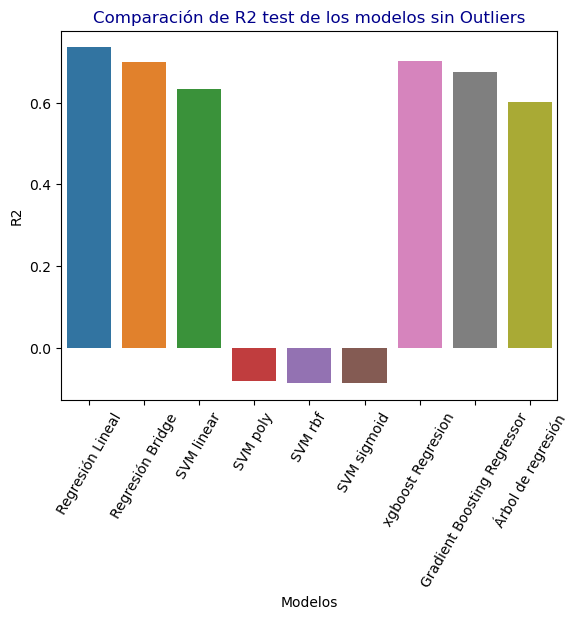

In [30]:
sns.barplot(x='Modelo', y='R2 test', data=resultados_sin_procesar)

# Añade título y etiquetas de eje
plt.title('Comparación de R2 test de los modelos sin Outliers', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=60)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos_without_outliers")
plt.show()

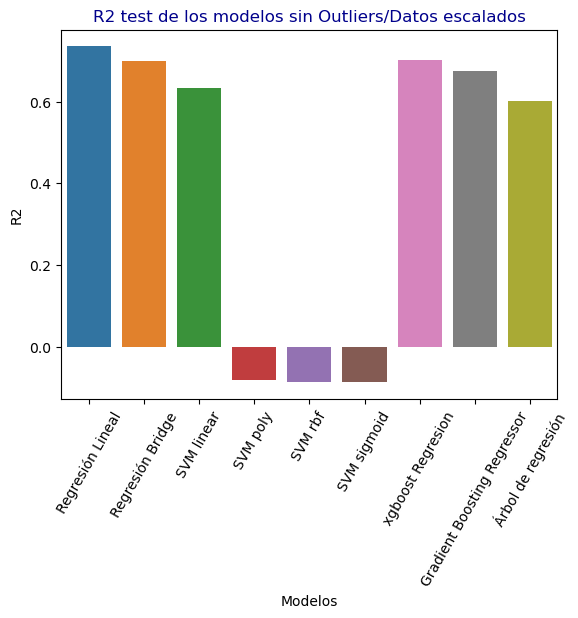

In [31]:
sns.barplot(x='Modelo', y='R2 test', data=resultados_sin_procesar)

# Añade título y etiquetas de eje
plt.title('R2 test de los modelos sin Outliers/Datos escalados', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=60)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos_without_outliers_datos_escalados")
plt.show()

### **Modelos elegidos para su aplicación**

Finalmente observamos que los datos sin outliers presentan mejor rendimiento que los datos completos, y un MAE más bajo por lo que procedemos a usar los datos sin outliers en la parte de aplicación de modelos final. Analizaremos más detalladamente el comportamiento del modelo y de sus predicciones con respecto a los datos reales.  

En el siguiente nootebook por tanto, trabajaremos ambos modelos Regresión Lineal y XGBoost Regresion con datos sin procesar para ver si conseguimos mejorar su rendimiento y quedarnos con el que mejores resultados aporte para generar nuestro dataset final con la columna precio predicho, variación del precio predicho con el precio real y sacar su porcentaje de rentabilidad. Estos datos serán los que usaremos para la parte de viualización front end.

Guardamos la tabla de evaluaciones obtenida:

In [32]:
resultados.to_csv('../data/tabla_resultados_evaluaciones_modelos_without_outliers.csv', index=False)

#### **Siguiente Nootebook <FONT COLOR="orange">Aplicacion_modelo_final.ipynb**<font>